## Facial keypoints detection

In this task you will create facial keypoint detector based on CNN regressor.


![title](example.png)

### Load and preprocess data

Script `get_data.py` unpacks data — images and labelled points. 6000 images are located in `images` folder and keypoint coordinates are in `gt.csv` file. Run the cell below to unpack data.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/gt.csv
/kaggle/input/images/images/02308.jpg
/kaggle/input/images/images/00021.jpg
/kaggle/input/images/images/01911.jpg
/kaggle/input/images/images/02979.jpg
/kaggle/input/images/images/03440.jpg
/kaggle/input/images/images/01773.jpg
/kaggle/input/images/images/05855.jpg
/kaggle/input/images/images/03863.jpg
/kaggle/input/images/images/01178.jpg
/kaggle/input/images/images/05095.jpg
/kaggle/input/images/images/02913.jpg
/kaggle/input/images/images/03096.jpg
/kaggle/input/images/images/03508.jpg
/kaggle/input/images/images/01406.jpg
/kaggle/input/images/images/01064.jpg
/kaggle/input/images/images/02252.jpg
/kaggle/input/images/images/01554.jpg
/kaggle/input/images/images/04370.jpg
/kaggle/input/images/images/02535.jpg
/kaggle/input/images/images/04553.jpg
/kaggle/input/images/images/01893.jpg
/kaggle/input/images/images/05381.jpg
/kaggle/input/images/images/00498.jpg
/kaggle/input/images/images/03044.jpg
/kaggle/input/images/images/03317.jpg
/kaggle/input/images/images/0

/kaggle/input/images/images/05285.jpg
/kaggle/input/images/images/00847.jpg
/kaggle/input/images/images/03467.jpg
/kaggle/input/images/images/04029.jpg
/kaggle/input/images/images/03099.jpg
/kaggle/input/images/images/00054.jpg
/kaggle/input/images/images/05927.jpg
/kaggle/input/images/images/01650.jpg
/kaggle/input/images/images/04733.jpg
/kaggle/input/images/images/00453.jpg
/kaggle/input/images/images/04793.jpg
/kaggle/input/images/images/04483.jpg
/kaggle/input/images/images/02710.jpg
/kaggle/input/images/images/02782.jpg
/kaggle/input/images/images/02696.jpg
/kaggle/input/images/images/02139.jpg
/kaggle/input/images/images/03093.jpg
/kaggle/input/images/images/02219.jpg
/kaggle/input/images/images/00782.jpg
/kaggle/input/images/images/00063.jpg
/kaggle/input/images/images/04274.jpg
/kaggle/input/images/images/05015.jpg
/kaggle/input/images/images/03733.jpg
/kaggle/input/images/images/03536.jpg
/kaggle/input/images/images/05424.jpg
/kaggle/input/images/images/05796.jpg
/kaggle/inpu

/kaggle/input/images/images/05068.jpg
/kaggle/input/images/images/04924.jpg
/kaggle/input/images/images/05517.jpg
/kaggle/input/images/images/02238.jpg
/kaggle/input/images/images/04454.jpg
/kaggle/input/images/images/00926.jpg
/kaggle/input/images/images/01123.jpg
/kaggle/input/images/images/04121.jpg
/kaggle/input/images/images/01270.jpg
/kaggle/input/images/images/02842.jpg
/kaggle/input/images/images/02293.jpg
/kaggle/input/images/images/00920.jpg
/kaggle/input/images/images/01872.jpg
/kaggle/input/images/images/02990.jpg
/kaggle/input/images/images/01013.jpg
/kaggle/input/images/images/03817.jpg
/kaggle/input/images/images/00337.jpg
/kaggle/input/images/images/04973.jpg
/kaggle/input/images/images/02300.jpg
/kaggle/input/images/images/04288.jpg
/kaggle/input/images/images/01138.jpg
/kaggle/input/images/images/00390.jpg
/kaggle/input/images/images/02967.jpg
/kaggle/input/images/images/00436.jpg
/kaggle/input/images/images/01046.jpg
/kaggle/input/images/images/05821.jpg
/kaggle/inpu

/kaggle/input/images/images/00302.jpg
/kaggle/input/images/images/01466.jpg
/kaggle/input/images/images/01981.jpg
/kaggle/input/images/images/05992.jpg
/kaggle/input/images/images/03241.jpg
/kaggle/input/images/images/02952.jpg
/kaggle/input/images/images/02820.jpg
/kaggle/input/images/images/01043.jpg
/kaggle/input/images/images/04707.jpg
/kaggle/input/images/images/05269.jpg
/kaggle/input/images/images/05579.jpg
/kaggle/input/images/images/00480.jpg
/kaggle/input/images/images/04057.jpg
/kaggle/input/images/images/01287.jpg
/kaggle/input/images/images/02966.jpg
/kaggle/input/images/images/04420.jpg
/kaggle/input/images/images/01472.jpg
/kaggle/input/images/images/00550.jpg
/kaggle/input/images/images/02875.jpg
/kaggle/input/images/images/03718.jpg
/kaggle/input/images/images/05329.jpg
/kaggle/input/images/images/01303.jpg
/kaggle/input/images/images/00901.jpg
/kaggle/input/images/images/01983.jpg
/kaggle/input/images/images/02541.jpg
/kaggle/input/images/images/01354.jpg
/kaggle/inpu

/kaggle/input/images/images/00861.jpg
/kaggle/input/images/images/03498.jpg
/kaggle/input/images/images/02284.jpg
/kaggle/input/images/images/03784.jpg
/kaggle/input/images/images/05719.jpg
/kaggle/input/images/images/01992.jpg
/kaggle/input/images/images/05159.jpg
/kaggle/input/images/images/01242.jpg
/kaggle/input/images/images/04796.jpg
/kaggle/input/images/images/05019.jpg
/kaggle/input/images/images/02726.jpg
/kaggle/input/images/images/05676.jpg
/kaggle/input/images/images/01199.jpg
/kaggle/input/images/images/03382.jpg
/kaggle/input/images/images/04215.jpg
/kaggle/input/images/images/02961.jpg
/kaggle/input/images/images/02295.jpg
/kaggle/input/images/images/03326.jpg
/kaggle/input/images/images/05416.jpg
/kaggle/input/images/images/02203.jpg
/kaggle/input/images/images/01527.jpg
/kaggle/input/images/images/00876.jpg
/kaggle/input/images/images/01907.jpg
/kaggle/input/images/images/02182.jpg
/kaggle/input/images/images/02776.jpg
/kaggle/input/images/images/04698.jpg
/kaggle/inpu

/kaggle/input/images/images/05704.jpg
/kaggle/input/images/images/00462.jpg
/kaggle/input/images/images/05616.jpg
/kaggle/input/images/images/05745.jpg
/kaggle/input/images/images/05499.jpg
/kaggle/input/images/images/05327.jpg
/kaggle/input/images/images/03921.jpg
/kaggle/input/images/images/05699.jpg
/kaggle/input/images/images/03714.jpg
/kaggle/input/images/images/03168.jpg
/kaggle/input/images/images/00375.jpg
/kaggle/input/images/images/04848.jpg
/kaggle/input/images/images/04402.jpg
/kaggle/input/images/images/04191.jpg
/kaggle/input/images/images/03312.jpg
/kaggle/input/images/images/05943.jpg
/kaggle/input/images/images/00272.jpg
/kaggle/input/images/images/03724.jpg
/kaggle/input/images/images/05212.jpg
/kaggle/input/images/images/04425.jpg
/kaggle/input/images/images/03034.jpg
/kaggle/input/images/images/00904.jpg
/kaggle/input/images/images/05013.jpg
/kaggle/input/images/images/04878.jpg
/kaggle/input/images/images/00511.jpg
/kaggle/input/images/images/05642.jpg
/kaggle/inpu

Now you have to read `gt.csv` file and images from `images` dir. File `gt.csv` contains header and ground truth points for every image in `images` folder. It has 29 columns. First column is a filename and next 28 columns are `x` and `y` coordinates for 14 facepoints. We will make following preprocessing:
1. Scale all images to resolution $100 \times 100$ pixels.
2. Scale all coordinates to range $[-0.5; 0.5]$. To obtain that, divide all x's by width (or number of columns) of image, and divide all y's by height (or number of rows) of image and subtract 0.5 from all values.

Function `load_imgs_and_keypoint` should return a tuple of two numpy arrays: `imgs` of shape `(N, 100, 100, 3)`, where `N` is the number of images and `points` of shape `(N, 28)`.

In [41]:
### Useful routines for preparing data
from numpy import array, zeros
from os.path import join
from skimage.color import gray2rgb
from skimage.io import imread
from skimage.transform import resize
import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import torch
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from sklearn.model_selection import train_test_split
import torch.optim as optim
from torch.autograd import Variable
from tqdm import tqdm_notebook
from torch.nn import functional as F
import torch.nn as nn
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D
from keras.layers import Conv2D,Dropout,Dense,Flatten
from keras.models import Sequential

In [3]:
paths_to_images = glob.glob('/kaggle/input/images/images/*')

In [4]:
def load_imgs_and_keypoints():
    gt = pd.read_csv('/kaggle/input/gt.csv')
    gt_ = gt.copy()
    paths_to_images = sorted(glob.glob('/kaggle/input/images/images/*'))
    imgs = []
    for path in paths_to_images:
        img = imread(path)
        gt_.loc[gt_[gt_['filename'] == path[-9:]].index, gt.filter(like = 'x').columns] = gt[gt['filename'] == path[-9:]]\
        .filter(like = 'x').apply(lambda t: t/img.shape[1] * 100)
        gt_.loc[gt_[gt_['filename'] == path[-9:]].index, gt.filter(like = 'y').columns] = gt[gt['filename'] == path[-9:]]\
        .filter(like = 'y').apply(lambda t: t/img.shape[0] * 100)
        imgs.append(resize(img, (100, 100, 3)))
    gt_ = gt_.drop('filename', axis = 1)
    return np.array(imgs), np.array(gt_)

In [5]:
%%time
imgs, points = load_imgs_and_keypoints()

CPU times: user 16min 44s, sys: 6min 24s, total: 23min 8s
Wall time: 14min 19s


### Visualize data

Let's prepare a function to visualize points on image. Such function obtains two arguments: an image and a vector of points' coordinates and draws points on image (just like first image in this notebook).

In [6]:
def visualize_points(img, points):
    xs = [i for i in range(points.shape[0]) if i % 2 == 0]
    ys = [i for i in range(points.shape[0]) if i not in xs]
    plt.scatter(points[xs], points[ys], c = 'r')
    plt.imshow(img)
    plt.show()

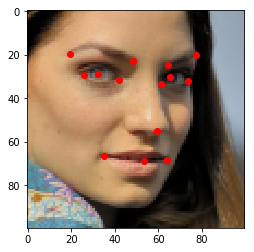

In [7]:
visualize_points(imgs[0], points[0])

### Train/val split

Run the following code to obtain train/validation split for training neural network.

In [8]:
imgs_train, imgs_val, points_train, points_val = train_test_split(imgs, points, test_size=0.1)

### Simple data augmentation

For better training we will use simple data augmentation — flipping an image and points. Implement function flip_img which flips an image and its' points. Make sure that points are flipped correctly! For instance, points on right eye now should be points on left eye (i.e. you have to mirror coordinates and swap corresponding points on the left and right sides of the face). VIsualize an example of original and flipped image.

In [9]:
def flip_img(img, points):
    # Write your code for flipping here
    flipped_img = np.zeros(shape = img.shape)
    flipped_poings = points.copy()
    for i in range(img.shape[1]):
        flipped_img[:, flipped_img.shape[1] - i - 1] = img[:, i]
    xs = [i for i in range(points.shape[0]) if i % 2 == 0]
    flipped_poings[xs] = img.shape[0] - points[xs]
    
    return flipped_img, flipped_poings

In [10]:
f_img, f_points = flip_img(imgs[1], points[1])

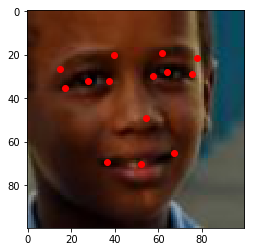

In [11]:
visualize_points(f_img, f_points)

Time to augment our training sample. Apply flip to every image in training sample. As a result you should obtain two arrays: `aug_imgs_train` and `aug_points_train` which contain original images and points along with flipped ones.

In [12]:
%%time
# Write your code here
l_imgs = []
l_points = []
for i in tqdm_notebook(range(imgs_train.shape[0])):
    im, po = flip_img(imgs[i], points[i])
    l_imgs.append(im)
    l_points.append(po)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.



CPU times: user 2.09 s, sys: 23.2 ms, total: 2.12 s
Wall time: 2.1 s


In [13]:
aug_imgs_train = np.array(l_imgs)
aug_points_train = np.array(l_points)

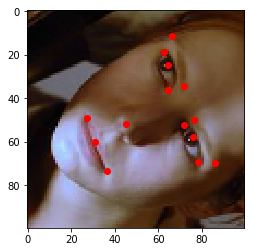

In [14]:
visualize_points(aug_imgs_train[2], aug_points_train[2])

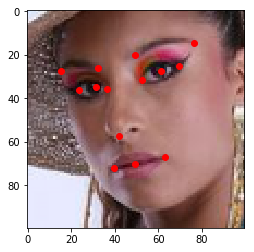

In [15]:
visualize_points(aug_imgs_train[3], aug_points_train[3])

In [16]:
train_data = np.concatenate((imgs_train, aug_imgs_train))
train_points = np.concatenate((points_train, aug_points_train))

### Network architecture and training

Now let's define neural network regressor. It will have 28 outputs, 2 numbers per point. The precise architecture is up to you. We recommend to add 2-3 (`Conv2D` + `MaxPooling2D`) pairs, then `Flatten` and 2-3 `Dense` layers. Don't forget about ReLU activations. We also recommend to add `Dropout` to every `Dense` layer (with p from 0.2 to 0.5) to prevent overfitting.


In [ ]:
# outputs = 28

In [ ]:
# class Net(torch.nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         # Определяем слои
#         self.conv1 = torch.nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3)
#         self.pool = torch.nn.MaxPool2d(kernel_size = 2, stride = 2)
#         self.conv2 = torch.nn.Conv2d(in_channels = 32, out_channels = 32, kernel_size = 3)
#         self.conv3 = torch.nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3)
#         self.fc1 = torch.nn.Linear(in_features = 64 * 10 * 10, out_features = 512)
#         self.fc2 = torch.nn.Linear(in_features = 512, out_features = 128)
#         self.fc3 = torch.nn.Linear(in_features = 128, out_features = outputs)
#         self.dropout = torch.nn.Dropout(p = 0.2)
#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = self.pool(F.relu(self.conv3(x)))
#         x = x.view(-1, 64 * 10 * 10)
#         x = self.dropout(F.relu(self.fc1(x)))
#         x = self.dropout(F.relu(self.fc2(x)))
#         x = self.dropout(self.fc3(x))
#         return x

In [ ]:
# class CNN(nn.Module):
#     def __init__(self):
#         super(CNN, self).__init__()
#         self.conv1 = nn.Conv2d(in_channels=3, out_channels=4, kernel_size=5) # (b,1,96,96) to (b,4,92,92)
#         self.conv1_bn = nn.BatchNorm2d(4)
#         self.conv2 = nn.Conv2d(in_channels=4, out_channels=64, kernel_size=3) # (b,4,46,46) to (b,64,44,44)
#         self.conv2_bn = nn.BatchNorm2d(64)
#         self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3) # (b,64,22,22) to (b,128,20,20)
#         self.conv3_bn = nn.BatchNorm2d(128)
#         self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3) # (b,128,10,10) to (b,256,8,8)
#         self.conv4_bn = nn.BatchNorm2d(256)
#         self.fc1 = nn.Linear(256*4*4, 1024)
#         self.fc2 = nn.Linear(1024, 256)
#         self.fc3 = nn.Linear(256, outputs)
#         self.dp1 = nn.Dropout(p=0.4)
    
        
    
#     def forward(self, x, verbose=False):
#         # apply conv1, relu and maxpool2d
#         x = self.conv1_bn(self.conv1(x))
#         x = F.relu(x)
#         x = F.max_pool2d(x, kernel_size=2)
#         x = self.dp1(x)
        
#         # apply conv2, relu and maxpool2d
#         x = self.conv2_bn(self.conv2(x))
#         x = F.relu(x)
#         x = F.max_pool2d(x, kernel_size=2)
#         x = self.dp1(x)
        
#         # apply conv3, relu and maxpool2d
#         x = self.conv3_bn(self.conv3(x))
#         x = F.relu(x)
#         x = F.max_pool2d(x, kernel_size=2)
#         x = self.dp1(x)
        
#         # apply conv4, relu and maxpool2d
#         x = self.conv4_bn(self.conv4(x))
#         x = F.relu(x)
#         x = F.max_pool2d(x, kernel_size=2)
        
#         # apply dropout
#         x = self.dp1(x)
        
#         x = x.view(-1, 256*4*4)
        
#         # now use FC layer with relu
#         x = self.fc1(x)
#         x = F.relu(x)
#         x = self.dp1(x)
#         x = self.fc2(x)
#         x = F.relu(x)
#         x = self.dp1(x)
#         x = self.fc3(x)
#         return x

In [ ]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# model = Net().to(device).double()
# criterion = torch.nn.MSELoss()
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# train_data = torch.utils.data.TensorDataset(torch.from_numpy(np.swapaxes(train_data, 1, 3)), 
#                                             torch.from_numpy(train_points))
# val_data = torch.utils.data.TensorDataset(torch.from_numpy(np.swapaxes(imgs_val, 1, 3)), 
#                                             torch.from_numpy(points_val))
# train_loader = torch.utils.data.DataLoader(train_data, batch_size = 4, shuffle = True)
# val_loader = torch.utils.data.DataLoader(val_data, batch_size = 4)

In [ ]:
# def testing(model, device, valid_loader):
#     model.eval()
#     test_loss = 0
#     for data, target in valid_loader:
#         data, target = data.to(device), target.to(device)
#         #     data = data.view(-1, 96*96)
#         #     data = data.view(-1, 1, 96, 96)
#         output = model(data)
#         loss = criterion(output, target)
#         test_loss += loss.item()
#         test_loss /= len(valid_loader.dataset)
#         return test_loss

# def training(epochs, model, criterion, device, train_loader, valid_loader, optimizer):
#     train_error_list = []
#     val_error_list = []
#     for epoch in range(epochs):
#         model.train()
#         train_loss = 0
#         for batch_idx, (data, target) in enumerate(train_loader):
# #             print(batch_idx)
#             data, target = data.to(device).double(), target.to(device).double()
#         #       data = data.view(-1, 96*96)
#         #       data = data.view(-1, 1, 96, 96)
#             optimizer.zero_grad()
#             output = model(data)
#             loss = criterion(output, target)
#             train_loss += loss.item()
#             loss.backward()
#             optimizer.step()
# #             if batch_idx % 5 == 0:
# #                 print("End of epoch {}: \nTraining error = [{}]\tValidation error = [None]".format(epoch+1, loss.item()))
#         train_loss /= len(train_loader.dataset)
#         eval_loss = testing(model, device, valid_loader)
#         train_error_list.append(train_loss)
#         val_error_list.append(eval_loss)
#         print("End of epoch {}: \nTraining error = [{}]\tValidation error = [{}]".format(epoch+1, train_loss, eval_loss))
#     return train_error_list, val_error_list

In [ ]:
# model = CNN().to(device).double()
# model.to(device)
# criterion = torch.nn.MSELoss() 
# optimizer = optim.Adam(model.parameters())
# train_error_list, valid_error_list = training(500, model, criterion, device, train_loader, val_loader, optimizer)

In [ ]:
# def train(epoch, model, train_loader, optimizer, cuda=None):
#     model.train()
#     loss_train = 0
#     for batch_idx, (data, target) in enumerate(train_loader):
#         data, target = Variable(data.to(device)), Variable(target.to(device))
#         optimizer.zero_grad()
#         output = model(data.double()) # get the index of the max log-probability
#         loss = criterion(output, target.double())
#         loss.backward()
#         optimizer.step()
#         loss_train += loss.item()
#     return loss_train / len(train_loader.dataset)

In [ ]:
# for epoch in range(500):
#     loss = train(epoch, model, train_loader, optimizer)
#     print ('epoch: {}, mse: {}'.format(epoch, loss))

In [19]:
output = 28

In [26]:
model = Sequential()

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(100,100,3)))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())

# model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
# model.add(BatchNormalization())
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())

# model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())

# model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())

# model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(output))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 100, 100, 32)      864       
_________________________________________________________________
leaky_re_lu_34 (LeakyReLU)   (None, 100, 100, 32)      0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 50, 50, 32)        9216      
_________________________________________________________________
leaky_re_lu_35 (LeakyReLU)   (None, 50, 50, 32)        0         
_________________________________________________________________
batch_normalization_31 (Batc (None, 50, 50, 32)        128       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 25, 25, 32)       

In [27]:
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mse'])

In [30]:
model.fit(train_data,train_points, epochs = 50,batch_size = 4,validation_split = 0.2)

Train on 8640 samples, validate on 2160 samples
Epoch 1/50
8640/8640 [==============================] - 19s 2ms/step - loss: 177.2189 - mse: 177.2188 - val_loss: 174.0566 - val_mse: 174.0566
Epoch 2/50
8640/8640 [==============================] - 19s 2ms/step - loss: 155.5139 - mse: 155.5138 - val_loss: 458.6212 - val_mse: 458.6211
Epoch 3/50
8640/8640 [==============================] - 21s 2ms/step - loss: 141.8970 - mse: 141.8969 - val_loss: 411.3379 - val_mse: 411.3379
Epoch 4/50
8640/8640 [==============================] - 20s 2ms/step - loss: 130.3984 - mse: 130.3985 - val_loss: 413.6816 - val_mse: 413.6815
Epoch 5/50
8640/8640 [==============================] - 19s 2ms/step - loss: 117.0029 - mse: 117.0029 - val_loss: 355.7233 - val_mse: 355.7234
Epoch 6/50
8640/8640 [==============================] - 21s 2ms/step - loss: 101.2107 - mse: 101.2107 - val_loss: 300.7385 - val_mse: 300.7386
Epoch 7/50
8640/8640 [==============================] - 20s 2ms/step - loss: 85.7677 - mse: 85

### Visualize results

Now visualize neural network results on several images from validation sample. Make sure that your network outputs different points for images (i.e. it doesn't output some constant).

In [33]:
prediction = model.predict(imgs_val)

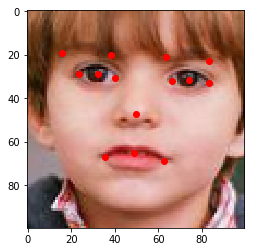

In [36]:
visualize_points(imgs_val[0], points_val[0])

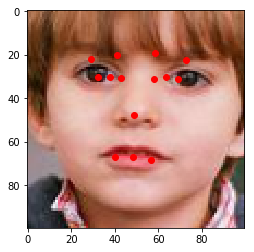

In [35]:
visualize_points(imgs_val[0], prediction[0])

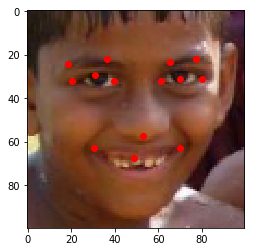

In [37]:
visualize_points(imgs_val[1], points_val[1])

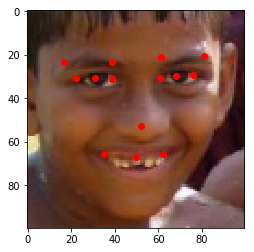

In [38]:
visualize_points(imgs_val[1], prediction[1])

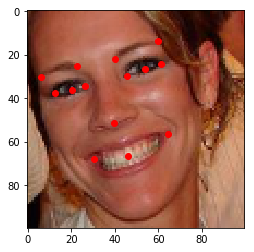

In [40]:
visualize_points(imgs_val[2], points_val[2])

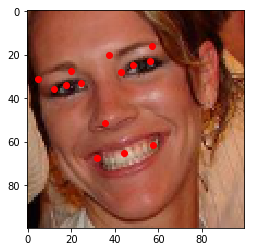

In [39]:
visualize_points(imgs_val[2], prediction[2])